C:\Users\chazp\AppData\Local\Temp\ipykernel_27276\3402626144.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')
C:\Users\chazp\AppData\Local\Temp\ipykernel_27276\3402626144.py:9: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 13


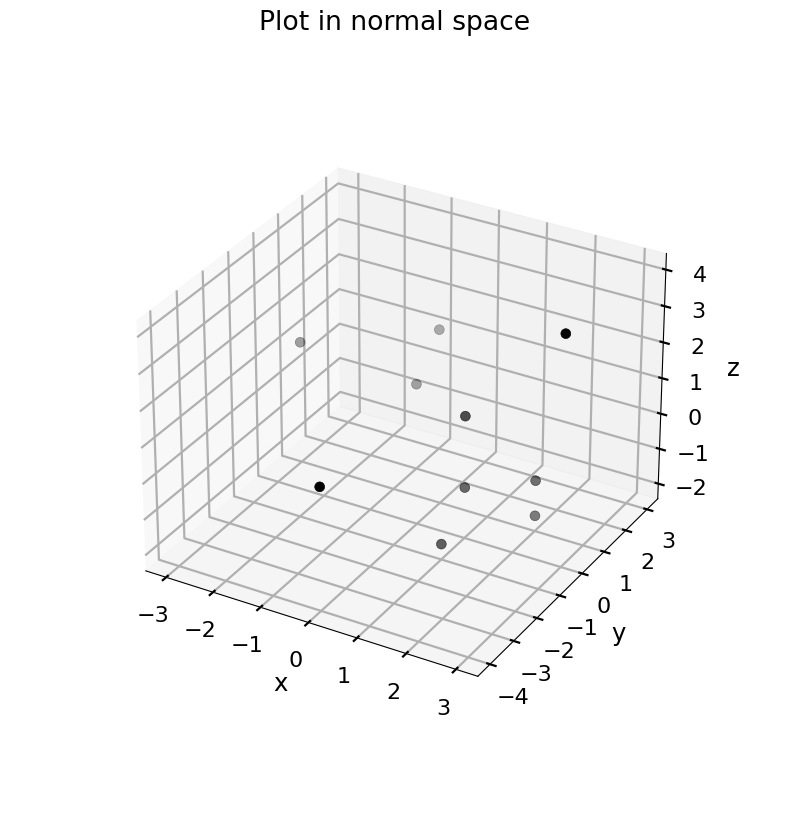

In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.dist = 13
ax.grid()
x =np.array([1,2,-1,3,2,1,-3,0,-1,1])
y = np.array([0,1,2,0,1,-1,1,-4,3,0])
z =np.array([-1,-1,0,4,-2,-2,1,1,1,1])

ax.scatter(x, y, z, c ='black', s = 50)
ax.set_title('Plot in normal space')

# Set axes label
ax.set_zlabel('z', labelpad=20)
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)

plt.show()

In [3]:
import scipy.linalg as scip
A = np.zeros((3,3))
A[0][0] = 3
A[0][1] = 2
A[0][2] = 4
A[2,:] = A[0,::-1]
A[1][0] = 2
A[1][2] = 2
# print(scip.eigh(A))
v = np.zeros((3,3))
v[0,:] = [-.5,1,0]
v[1,:] = [-1,0,1]
v[2,:] = [1,0.5,1]
v = v.T
v = np.linalg.inv(v)

# w, b = np.linalg.eig(A)
# print(b[:,2]*8)
# print(np.dot(A,b[:,2]))




C:\Users\chazp\AppData\Local\Temp\ipykernel_27276\2123917971.py:3: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 13


[[ 0.    0.67  2.   -1.56  0.89 -0.67  1.33 -3.78  2.67 -0.44]
 [-1.   -1.67  0.    0.89 -2.22 -1.33  1.67  1.44  0.33  0.11]
 [ 0.    0.67  0.    3.11  0.22 -0.67 -0.67 -0.44  0.67  0.89]]


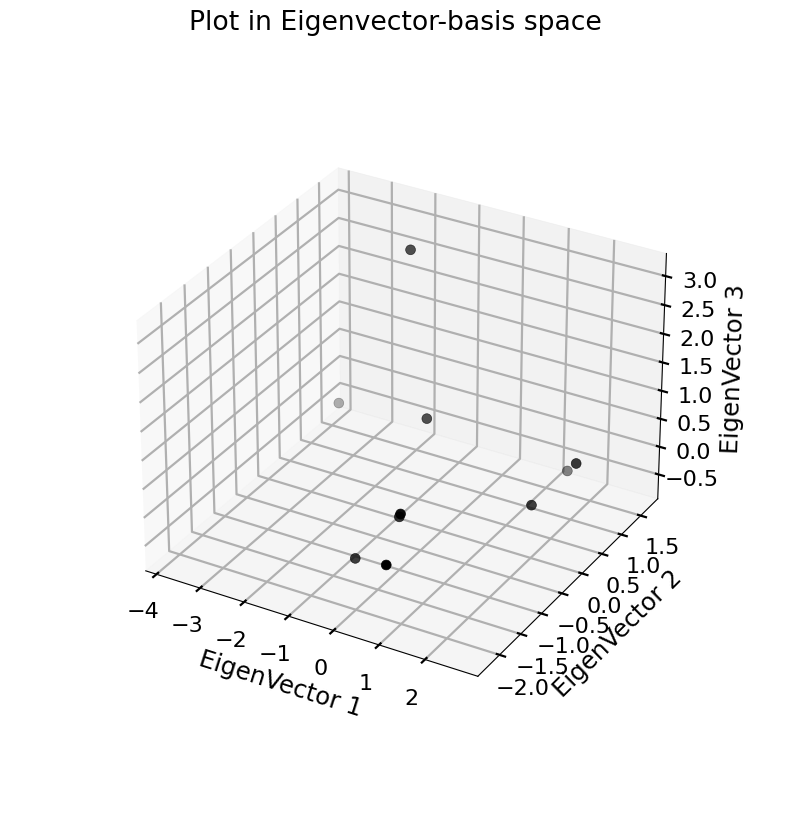

In [4]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.dist = 13
ax.grid()
x =np.array([1,2,-1,3,2,1,-3,0,-1,1])
y = np.array([0,1,2,0,1,-1,1,-4,3,0])
z =np.array([-1,-1,0,4,-2,-2,1,1,1,1])
input  = np.row_stack((x,y,z))
input = np.dot(v,input)
print(np.round(input,2))
# for i in range(input.shape[1]):
#     print(np.round(input[:,i],2))
ax.scatter(input[0,:], input[1,:], input[2,:], c ='black', s = 50)
ax.set_title('Plot in Eigenvector-basis space')
# ax.scatter(input[0,9], input[1,9], input[2,9], c ='blue', s = 100)
# ident = np.identity(3)
# tranident = np.matmul(v.T, ident)
# ax.scatter(tranident[0,:], tranident[1,:], tranident[2,:], c ='blue', s = 120)
# Set axes label
ax.set_xlabel('EigenVector 1', labelpad=20)
ax.set_ylabel('EigenVector 2', labelpad=20)
ax.set_zlabel('EigenVector 3', labelpad=20)

plt.show()

In [5]:
c = np.zeros((2,2))
c[:,0] = [3/14, -1/7]
c[:,1] = [-1/7, 3/7]
A = np.zeros((3,2))
A[:,0] = [1,1,2]
A[:,1] = [-1,1,1]
b = np.zeros((3,1))
b[:,0] = [2,4,8]

print(np.dot(c,A.T).dot(b))

[[3.28571429]
 [1.14285714]]


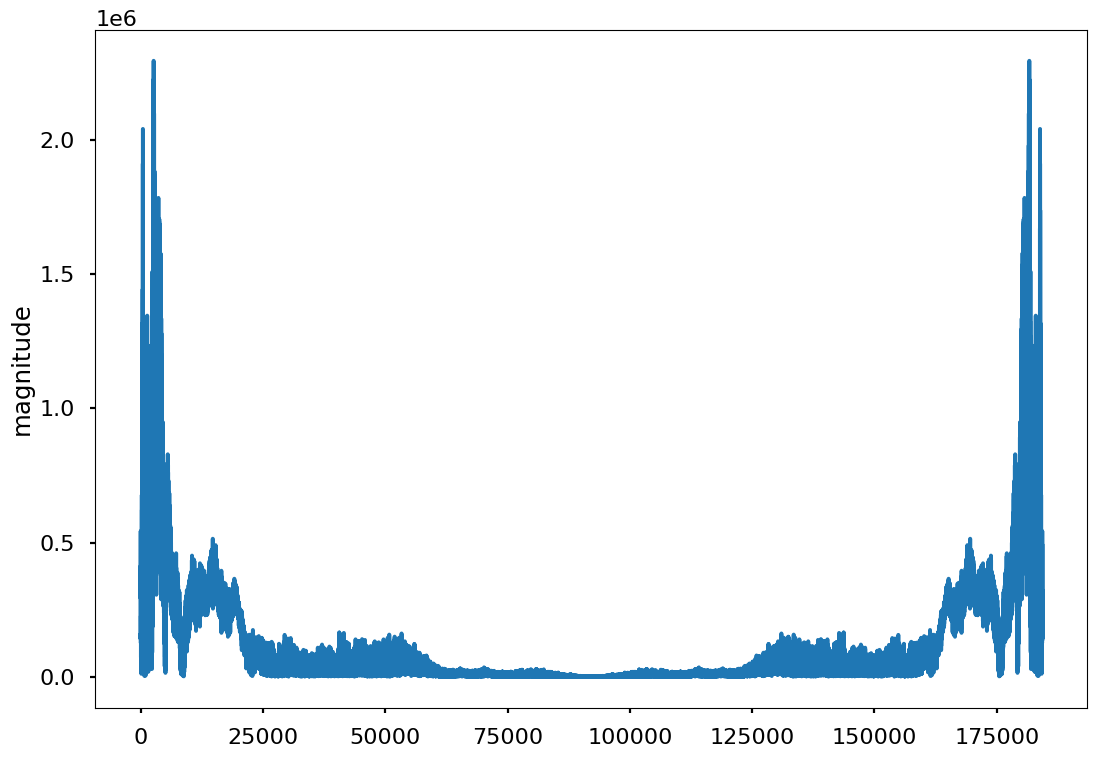

In [6]:
import scipy.io.wavfile

fs, data = scipy.io.wavfile.read('mynamerecording.wav')

data = data.T[0]

fourier = np.abs(np.fft.fft(data))
w = 2*np.pi*(np.fft.fftfreq(len(fourier)))
scipy.io.wavfile.write('testing.wav', fs, data)
plt.ylabel('magnitude')
plt.xlabel = 'Analog angular frequency'
plt.plot(fourier)


In [7]:
a = [2,9,10,7,2,6,8,16,14]
b = [4,12,14,8,5,7,11,16,10]
a = np.array(a)
b = np.array(b)
print(np.dot(a,b)/9 - np.mean(a)*np.mean(b))

14.740740740740762


In [8]:
import random

s1 = []
s2 = []
s3 = []

for i in range(10):
    s1.append(random.randint(-10,10))
    s2.append(random.randint(-10,10))
    s3.append(random.randint(-10,10))
s1 = np.array(s1)
s2 = np.array(s2)
s3 = np.array(s3)

S = np.row_stack((s1,s2,s3))
print(np.cov(S))


[[ 15.43333333  10.01111111 -13.3       ]
 [ 10.01111111  37.21111111 -20.25555556]
 [-13.3        -20.25555556  40.9       ]]


In [9]:
print("This is S \n", S)
means = np.mean(S, axis = 1).reshape(3,1)
temp = S -means
print("\nThis is covariance Matrix \n ", 1/10*temp.dot(temp.T))

This is S 
 [[ -5  -1   0   7   5  -6   1   1   0  -1]
 [ -9  -2   5   6   7   7  -1   1   4  -9]
 [  3  -7 -10 -10  -6   0  -2  -5   7   7]]

This is covariance Matrix 
  [[ 13.89   9.01 -11.97]
 [  9.01  33.49 -18.23]
 [-11.97 -18.23  36.81]]


2.0


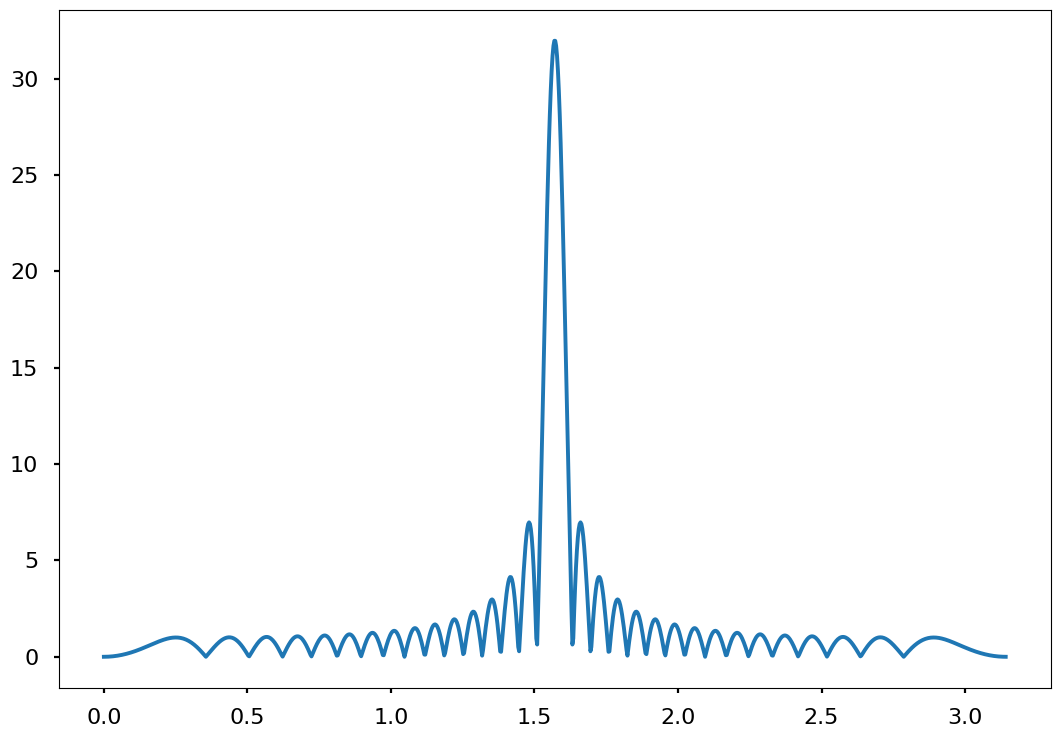

In [47]:
# def arraycoef(F,D,N,theta):
#    x= lambda D,N,theta,K : np.abs((1-np.exp(N*1j*K*D*np.cos(theta)))/(1-np.exp(1j*K*D*np.cos(theta))))
#    return x
coef= lambda D,N,theta,K : np.abs((1-np.exp(N*1j*K*D*np.cos(theta)))/(1-np.exp(1j*K*D*np.cos(theta))))

lam = .5
K = 2*np.pi/lam
D = .5/2
N = 32
print(coef(D,2,np.pi/2,K))

temp = np.linspace(0,np.pi, 1000)
plt.plot(temp,coef(D,N,temp,K))

2.0


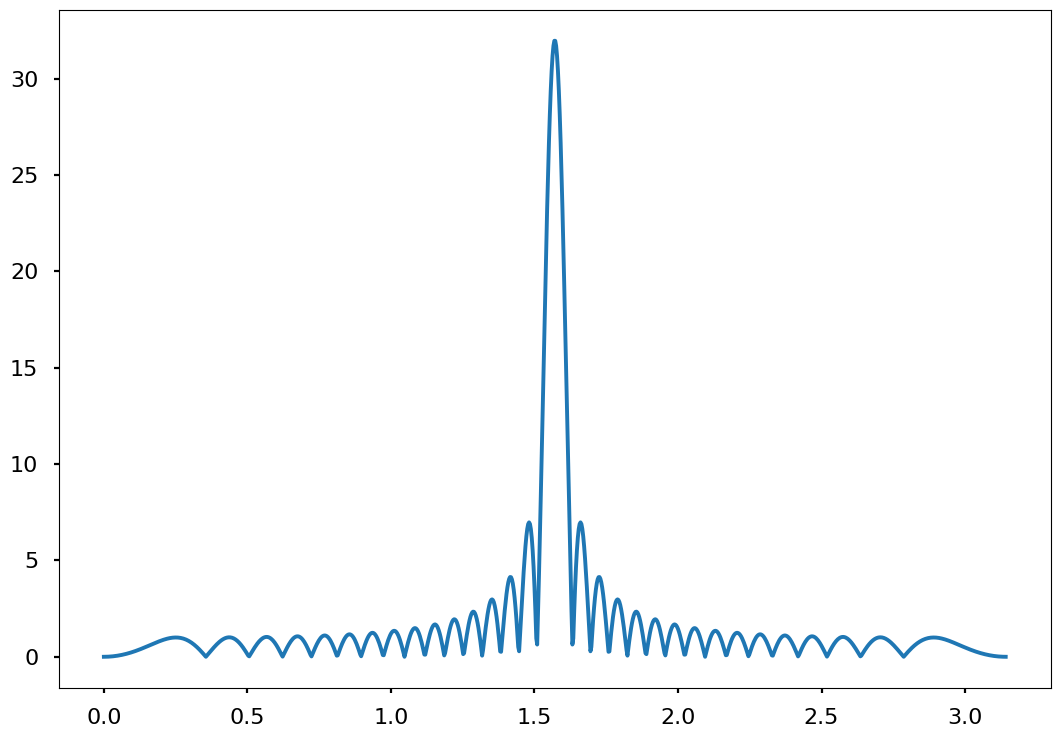

In [50]:
lam = .5
K = 2*np.pi/lam
D = .5/2
N = 32
print(coef(D,2,np.pi/2,K))

temp = np.linspace(0,np.pi, 1000)
plt.plot(temp,coef(D,N,temp,K))

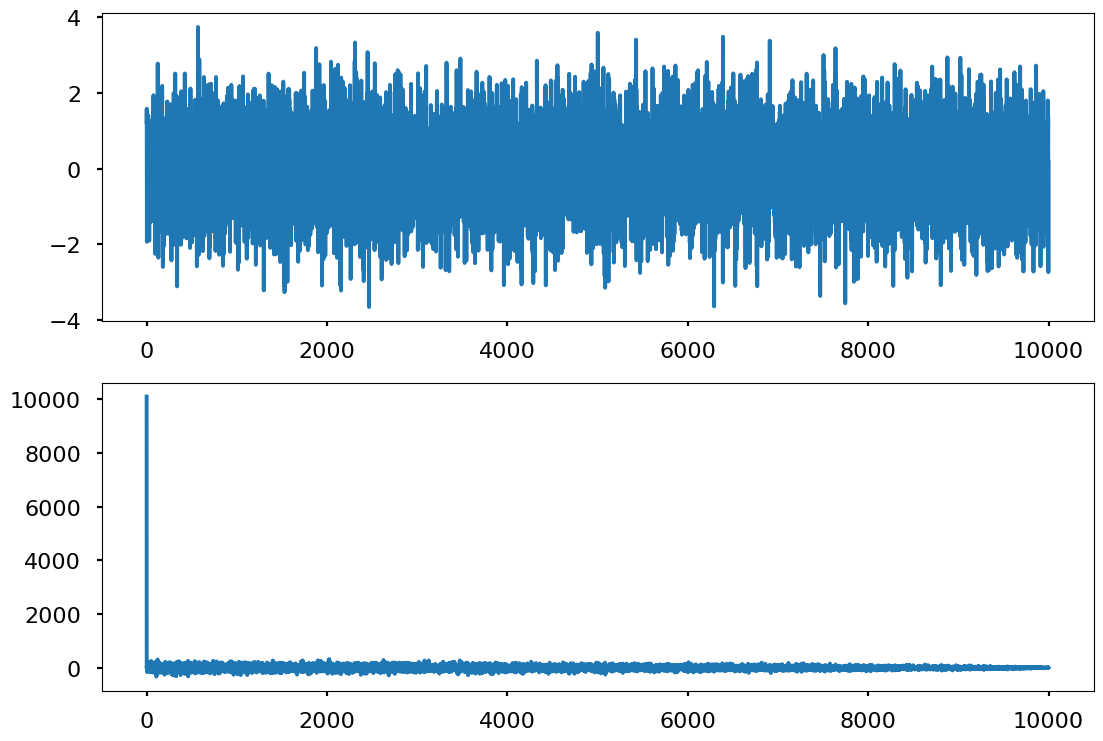

In [69]:
samps = np.random.normal(0,1,10000)
plt.figure()
plt.subplot(2,1,1)
plt.plot(np.arange(samps.size),samps)
plt.subplot(2,1,2)
temp = np.correlate(a=samps,v=samps, mode='full')
temp = temp[temp.size//2:]
plt.plot(np.arange(samps.size),temp)